# Mengukur Performa Penjualan Ritel Online

**Homework Rakamin Trial Class - Mini Case**

Oleh: [Yoga Perdana Putra](https://www.linkedin.com/in/yogapp/)

---

**Deskripsi:**

Data transaksi sebuah perusahaan ritel online yang terjadi pada tahun 2009-2011

**Dataset:**

https://drive.google.com/drive/folders/1UbsUuQJgkF-7ilhhNL2tOnpzlJ-WS_Fu?usp=sharing

**Atribut:**

* `Invoice`: Nomor _invoice_ 6 digit yang ditetapkan secara unik untuk setiap transaksi. Jika kode ini dimulai dengan huruf 'C', itu menunjukkan pembatalan.
* `StockCode`: Kode produk (barang). Angka 5 digit yang ditetapkan secara unik untuk setiap produk yang berbeda.
* `Description`: Nama produk.
* `Quantity`: Jumlah kuantitas setiap produk per transaksi.
* `InvoiceDate`: Tanggal dan waktu _invoice_, yakni hari dan waktu saat transaksi dibuat.
* `UnitPrice`: Harga satuan atau harga produk per unit dalam _sterling_ (£).
* `CustomerID`: Nomor 5 digit yang ditetapkan secara unik untuk setiap pelanggan.
* `Country`: Nama negara tempat tinggal pelanggan.

---

## Memuat Data

_Import library_ yang digunakan:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Mendapatkan dataset dari berkas CSV lalu menampilkannya sebagai _dataframe_ (5 teratas dan 5 terbawah):

In [2]:
df = pd.read_csv('online_retail_II.csv')
display(df)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Dari _dataframe_ tersebut, dapat diketahui jumlah baris dan kolom yang terdapat pada dataset yaitu sebanyak 1067371 baris dengan 8 kolom.

In [3]:
print('Total baris:', df.shape[0])
print('Total kolom:', df.shape[1])

Total baris: 1067371
Total kolom: 8


Menampilkan informasi mengenai kolom-kolom pada _dataframe_:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Dapat diketahui bahwa pada kolom `Description` dan `Customer ID` terdapat data yang kosong atau hilang yang nilainya _null_. Hal tersebut ditunjukkan pada _count non-null_ yang tidak sama dengan total baris pada dataset.

---

## Section 1: Menganalisis Rata-Rata Pendapatan Per Tahun

### Membuat Fitur Baru: `Year`

Buat kolom baru dengan nama `Year` yang berisi nilai tahun dari `InvoiceDate`. Tipe data kolom `InvoiceDate` perlu diubah menjadi tipe ‘datetime’.

In [5]:
df['Year'] = pd.DatetimeIndex(pd.to_datetime(df['InvoiceDate'])).year
display(df)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### _Filtering Data_

Ketentuan: 
- `Quantity` minimal 1 (tidak boleh 0 dan minus)
- Kolom `Invoice` tidak mengandung huruf ‘C’ karena hal tersebut menandakan pelanggan tidak menyelesaikan belanjanya atau melakukan pembatalan.

In [6]:
sales = df[(df['Quantity'] >= 1) & (df['Invoice'].str.contains('C') == False)]
display(sales)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Membuat Fitur Baru: `Revenue`

Buat kolom baru bernama `Revenue` dengan nilai `Quantity` dikali dengan `Price`:

In [7]:
sales = sales.copy()
sales['Revenue'] = sales['Quantity'] * sales['Price']
display(sales)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Menghitung Rata-Rata Pendapatan Per Tahun

In [8]:
avg_revenue = sales.groupby('Year')['Revenue'].mean()
print(avg_revenue)

Year
2009    18.713273
2010    19.908987
2011    20.058767
Name: Revenue, dtype: float64


Menampilkan visualisasi grafiknya:

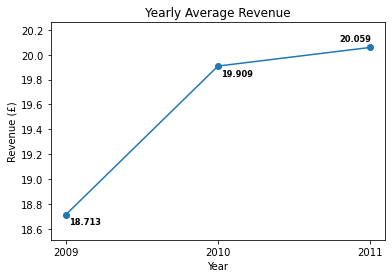

In [9]:
avg_revenue.plot(
    title='Yearly Average Revenue', 
    xlabel='Year', 
    ylabel='Revenue (£)', 
    marker='o',
    figsize=(6, 4),
    xticks=avg_revenue.index
)
# Jika data berubah maka posisi harus disesuaikan lagi
for a, b in avg_revenue.items():
    if a != max(avg_revenue.index):
        pos = (a+.02, b-.08)
    else:
        pos = (a-.2, b+.05)
    plt.text(a, b, round(b, 3), position=pos, fontsize='small', fontweight='bold')
plt.margins(.05, .15)
plt.show()

### Interpretasi

Dari grafik hasil perhitungan rata-rata pendapatan per tahun diatas, dapat diketahui bahwa terjadi kenaikan setiap tahunnya. Terjadi peningkatan yang sangat pesat pada tahun 2010. Namun peningkatan pada tahun 2011 tidak sebesar seperti sebelumnya.

---

## Section 2: Menganalisis Transaksi Pelanggan Per Tahun

### _Filtering Data_

#### Pelanggan yang menyelesaikan transaksi mereka 

_Filtering_ menggunakan data sales (data yang sudah di-_filter_ pada _section 1_) dengan ketentuan `CustomerID` tidak boleh kosong atau _null_.

In [10]:
finished = sales[sales['Customer ID'].notna()]
display(finished)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### Pelanggan yang membatalkan transaksi mereka

_Filtering data_ untuk mengelompokkan pelanggan yang membatalkan belanjanya, dengan cara mendeteksi kolom `Invoice` yang mengandung huruf ‘C’.

In [11]:
cancel = df[df['Invoice'].str.contains('C')]
display(cancel)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Jumlah transaksi yang berhasil dan yang dibatalkan setiap tahunnya

In [12]:
finish_yearly = finished.groupby('Year').size()
cancel_yearly = cancel.groupby('Year').size()
yearly_trans = pd.concat([finish_yearly, cancel_yearly], axis=1, keys=['Finished', 'Canceled'])
display(yearly_trans)

,Finished,Canceled
Year,,
2009,30761,1015
2010,403094,9919
2011,371765,8560


Visualisasi dari tabel diatas:

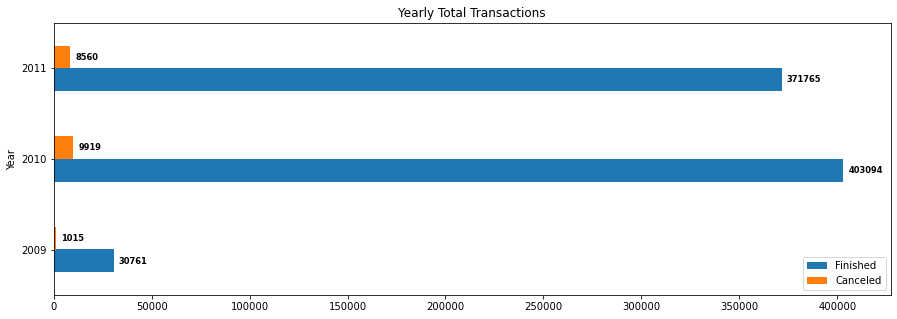

In [13]:
ax = yearly_trans.plot.barh(
    title='Yearly Total Transactions', 
    xlabel='Year', 
    ylabel='Transactions',
    figsize=(15, 5)
)
for container in ax.containers:
    ax.bar_label(container, padding=5, fontsize='small', fontweight='bold')
plt.margins(.06)
plt.legend(loc='lower right')
plt.show()

### _Cancellation Rate_

_Cancellation rate_ adalah persentase pelanggan yang melakukan pembatalan pesanan yang telah dilakukan. Formulanya adalah jumlah pelanggan yang membatalkan pesanan dibagi dengan jumlah seluruh pelanggan kemudian dikali 100%.

In [14]:
cust_cancel = cancel.groupby('Year')['Customer ID'].nunique()
cust_total = df.groupby('Year')['Customer ID'].nunique()
yearly_cr = pd.concat([cust_total, cust_cancel], axis=1, keys=['Total', 'Cancel'])
yearly_cr['Rate'] = yearly_cr['Cancel'] / yearly_cr['Total'] * 100
display(yearly_cr)

,Total,Cancel,Rate
Year,,,
2009,1045,309,29.569378
2010,4289,1730,40.335743
2011,4244,1494,35.202639


Visualisasi hasil perhitungan _cancellation rate_ berdasarkan jumlah pelanggan:

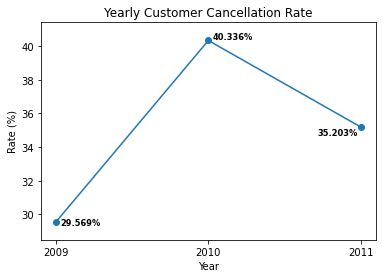

In [15]:
yearly_cr['Rate'].plot(
    title='Yearly Customer Cancellation Rate', 
    xlabel='Year', 
    ylabel='Rate (%)', 
    marker='o',
    figsize=(6, 4),
    xticks=yearly_cr.index
)
# Jika data berubah maka posisi harus disesuaikan lagi
for a, b in yearly_cr['Rate'].items():
    if a != max(yearly_cr.index):
        if b != max(yearly_cr['Rate']):
            pos = (a+.03, b-.2)
        else:
            pos = (a+.03, b+.1)
    else:
        pos = (a-.28, b-.5)
    plt.text(a, b, str(round(b, 3)) + '%', position=pos, fontsize='small', fontweight='bold')
plt.margins(.05, .1)
plt.show()

Jika interpretasi _cancellation rate_ adalah berdasarkan persentase transaksi yang dibatalkan, maka hasil perhitungannya adalah sebagai berikut:

In [16]:
trans_cancel = cancel.groupby('Year').size()
trans_total = df.groupby('Year').size()
yearly_cr_trans = pd.concat([trans_total, trans_cancel], axis=1, keys=['Total', 'Cancel'])
yearly_cr_trans['Rate'] = yearly_cr_trans['Cancel'] / yearly_cr_trans['Total'] * 100
display(yearly_cr_trans)

,Total,Cancel,Rate
Year,,,
2009,45228,1015,2.244185
2010,522714,9919,1.897596
2011,499429,8560,1.713957


Visualisasi hasil perhitungan _cancellation rate_ berdasarkan jumlah transaksi:

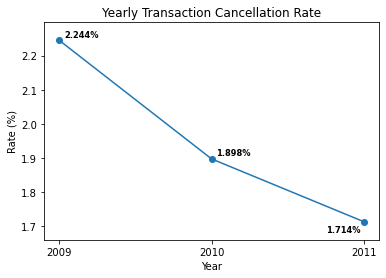

In [17]:
yearly_cr_trans['Rate'].plot(
    title='Yearly Transaction Cancellation Rate', 
    xlabel='Year', 
    ylabel='Rate (%)', 
    marker='o',
    figsize=(6, 4),
    xticks=yearly_cr_trans.index
)
# Jika data berubah maka posisi harus disesuaikan lagi
for a, b in yearly_cr_trans['Rate'].items():
    if a != max(yearly_cr_trans.index):
        pos = (a+.03, b+.01)
    else:
        pos = (a-.25, b-.03)
    plt.text(a, b, str(round(b, 3)) + '%', position=pos, fontsize='small', fontweight='bold')
plt.margins(.05, .1)
plt.show()

### Interpretasi

Dari grafik yang ditunjukkan di atas dapat terlihat bahwa terjadi peningkatan pesat jumlah transaksi pada tahun 2010 baik transaksi yang berhasil maupun transaksi yang dibatalkan. Setelah itu terjadi penurunan pada tahun berikutnya (2011).

Hal serupa juga dapat terlihat pada grafik _customer cancellation rate_. Namun jika dilakukan perhitungan _cancellation rate_ berdasarkan jumlah transaksi, ditemukan bahwa persentasenya semakin menurun tiap tahunnya. Saat ditinjau kembali perubahan antara jumlah transaksi yang berhasil dengan yang dibatalkan setiap tahunnya, masih terlihat pola yang sama yaitu terjadi peningkatan pesat pada tahun 2010 dan kembali menurun pada tahun 2011.